# <center><b> Python Programming in Energy Science I</b></center>

## <center> Assignment A4 </center>

### <center>[Group 4]</center>
<center> Juan Manuel Boullosa Novo </center>

-------------------------------

### E12: Array calculations

In [4]:
import numpy as np
t = np.linspace(0,60, 5000)
frequencies = [2*np.pi/60, 2*np.pi/30, 2*np.pi/100, 2*np.pi/120]

data = np.array([[np.sin(omega*t), np.cos(omega*t)] for omega in frequencies])


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.genfromtxt('results_farm.csv.gz', delimiter=',', skip_header=1)

# Get the unique states and turbines
states = np.unique(data[:, 0])
turbines = np.unique(data[:, 1])

# Calculate the mean AMB_P and P for each state and turbine
mean_AMB_P = np.array([data[(data[:, 0] == state) & (data[:, 1] == turbine), 4].mean() for state in states for turbine in turbines])
mean_P = np.array([data[(data[:, 0] == state) & (data[:, 1] == turbine), 7].mean() for state in states for turbine in turbines])

# Create a line plot
plt.figure()
plt.plot(turbines, mean_AMB_P, label='Mean AMB_P')
plt.plot(turbines, mean_P, label='Mean P')
plt.xlabel('Turbine Index')
plt.ylabel('Power')
plt.title('Mean Ambient Power and Produced Power vs Turbine Index')
plt.legend()
plt.show()

# Replace EFF values of zero or below with np.nan
data[data[:, 12] <= 0, 12] = np.nan

# Create a 2D pcolormesh plot for EFF
plt.figure()
plt.pcolormesh(turbines, states, data[:, 12].reshape(len(states), len(turbines)), cmap='viridis')
plt.colorbar(label='EFF')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('EFF as a function of Turbine and State')
plt.show()

# Create a 2D pcolormesh plot for WS
plt.figure()
plt.pcolormesh(turbines, states, data[:, 5].reshape(len(states), len(turbines)), cmap='inferno')
plt.colorbar(label='WS')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('WS as a function of Turbine and State')
plt.show()

# Create a 2D pcolormesh plot for P
plt.figure()
plt.pcolormesh(turbines, states, data[:, 7].reshape(len(states), len(turbines)), cmap='plasma')
plt.colorbar(label='P')
plt.xlabel('Turbine')
plt.ylabel('State')
plt.title('P as a function of Turbine and State')
plt.show()

KeyboardInterrupt: 

### E15: Wind farm data - part II

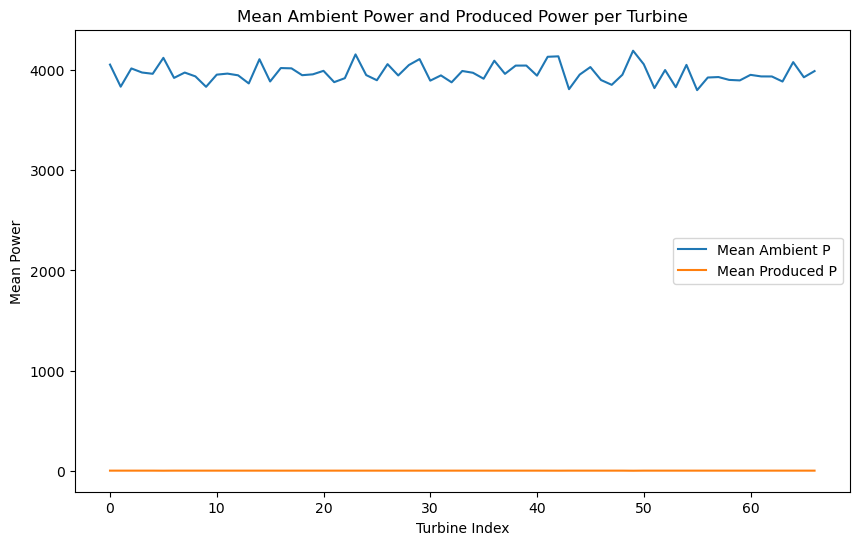

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('results_farm.csv.gz', delimiter=',', skip_header=1)

# Step 1: Extract unique turbine indices
turbine_indices = np.unique(data[:,1])  # Assuming 'turbine' is the second column

# Step 2: Filter data for each turbine and Step 3: Calculate means
mean_AMB_P = []
mean_P = []
for idx in turbine_indices:
    turbine_data = data[data[:,1] == idx]  # Filter data for current turbine
    mean_AMB_P.append(np.mean(turbine_data[:,7]))
    mean_P.append(np.mean(turbine_data[:,8]))

# Step 4: Plot means against turbine indices
plt.figure(figsize=(10, 6))
plt.plot(turbine_indices, mean_AMB_P, label='Mean Ambient P')
plt.plot(turbine_indices, mean_P, label='Mean Produced P')

# Step 5: Add labels and title
plt.xlabel('Turbine Index')
plt.ylabel('Mean Power')
plt.title('Mean Ambient Power and Produced Power per Turbine')

# Step 6: Add legend
plt.legend()
plt.show()


In [2]:
# Replace all values of the wind turbine efficiency EFF (column 12 in data) by np.nan if they are zero (or below)
data[data[:, 12] <= 0, 12] = np.nan

# Extract unique state indices
state_indices = np.unique(data[:, 2])

# Create a 2D array for EFF values
eff_values = np.empty((len(turbine_indices), len(state_indices)))
eff_values[:] = np.nan

# Fill the 2D array with EFF values for each turbine and state
for i, idx in enumerate(turbine_indices):
    for j, state in enumerate(state_indices):
        turbine_state_data = data[(data[:, 1] == idx) & (data[:, 2] == state)]
        if turbine_state_data.size > 0:
            eff_values[i, j] = np.nanmean(turbine_state_data[:, 12])

# Create a 2D pcolormesh plot of the EFF values
plt.figure(figsize=(10, 6))
c = plt.pcolormesh(turbine_indices, state_indices, eff_values.T, cmap='viridis', shading='auto')

plt.xlabel('Turbine Index')
plt.ylabel('State')
plt.title('Wind Turbine Efficiency as a Function of Turbine and State')
plt.colorbar(c, label='Efficiency')
plt.show()

C:\Users\Boujuan\AppData\Local\Temp\ipykernel_35940\2294577787.py:16: RuntimeWarning: Mean of empty slice
  eff_values[i, j] = np.nanmean(turbine_state_data[:, 12])


KeyboardInterrupt: 